# Task 27-> Evaluation Techniques for classification models

## Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, classification_report, matthews_corrcoef,
    cohen_kappa_score, log_loss, balanced_accuracy_score, make_scorer
)
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

## Load the wine dataset


In [2]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

## First 5 rows of the dataset

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Check for missing values

In [4]:
print("\nMissing values in each column:")
print(X.isnull().sum())


Missing values in each column:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


## Shuffle and split the dataset


In [5]:
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Scale the data


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Initialize and train the logistic regression model


In [7]:
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

## Predict the test set results


In [8]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# 1. Confusion Matrix
A confusion matrix is a table used to describe the performance of a classification model. It provides a breakdown of correct and incorrect predictions by comparing actual values with predicted values. The confusion matrix consists of four key components:

## True Positives (TP): 
Instances where the model correctly predicts the positive class.
## True Negatives (TN): 
Instances where the model correctly predicts the negative class.
## False Positives (FP): 
Instances where the model incorrectly predicts the positive class (also known as Type I error).
## False Negatives (FN): 
Instances where the model incorrectly predicts the negative class (also known as Type II error).
The confusion matrix helps in understanding the types of errors the model is making and in which classes they are occurring.

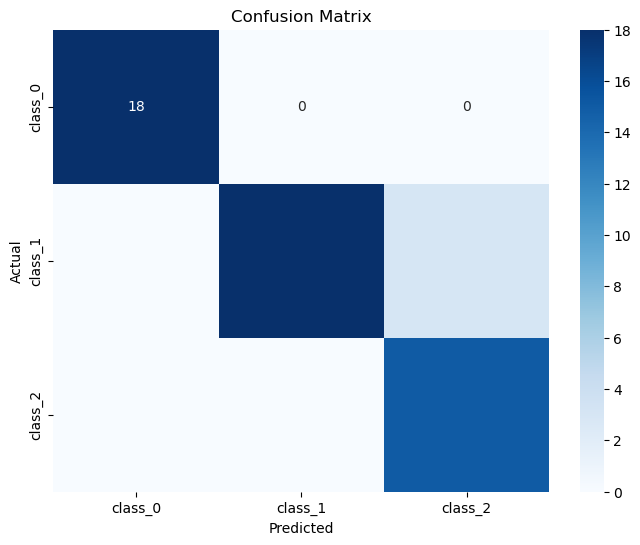

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This heatmap visualizes the confusion matrix, where the color intensity represents the frequency of each category. It helps in identifying how often the model correctly or incorrectly classifies each class.


# 2. Accuracy
Accuracy is the simplest metric for evaluating a classification model. It is calculated as the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.
<br><br>
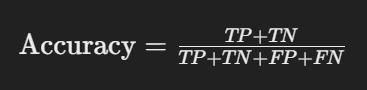
<br><br>
Accuracy gives a general sense of how often the model is correct. However, it may not be reliable for imbalanced datasets where one class is more frequent than the other.

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9444


# 3. Precision
Precision, also known as Positive Predictive Value, measures the accuracy of positive predictions. It is the ratio of true positives to the sum of true positives and false positives.<br><br>
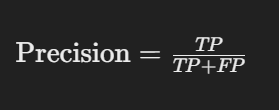
<br><br>
Precision is crucial when the cost of false positives is high, such as in spam detection or medical diagnosis.

In [11]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

Precision: 0.9537


# 4. Recall (Sensitivity)
Recall, also known as Sensitivity or True Positive Rate, measures the ability of the model to identify all positive instances. It is the ratio of true positives to the sum of true positives and false negatives.<br><br>
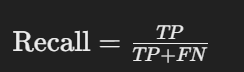
<br><br>
Recall is important when the cost of false negatives is high, such as in disease detection or fraud detection.

In [12]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

Recall: 0.9444


# 5. F1 Score
The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially useful when dealing with imbalanced datasets.<br><br>
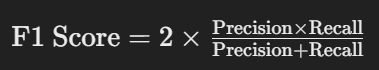
<br><br>

In [13]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9448


# 6. ROC Curve (Receiver Operating Characteristic Curve)
The ROC curve is a graphical representation of the true positive rate (recall) versus the false positive rate at various threshold settings. The curve helps in evaluating the trade-offs between true positives and false positives at different thresholds.

## True Positive Rate (TPR): 
Same as recall.
## False Positive Rate (FPR): 
The ratio of false positives to the sum of false positives and true negatives.
<br><br>
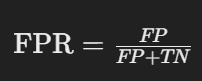
<br><br>

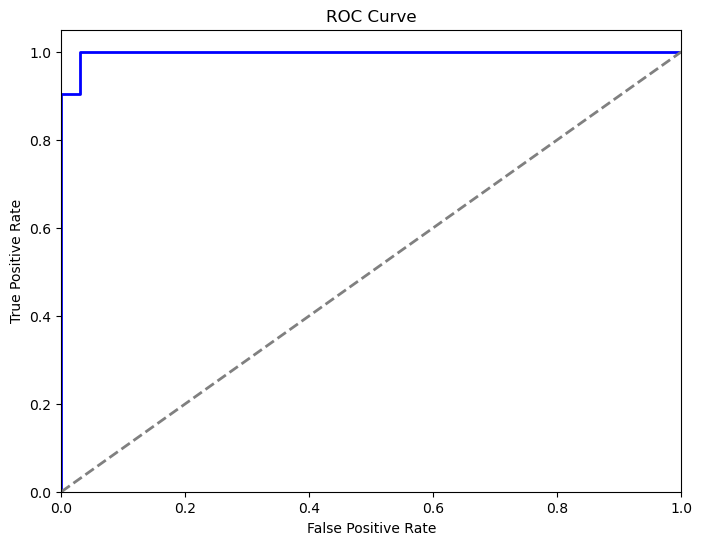

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

This line chart plots the true positive rate (recall) against the false positive rate at various classification thresholds. The area under the curve (AUC) represents the model's overall performance.


# 7. AUC (Area Under the Curve)
The AUC measures the overall performance of the ROC curve. It is the area under the ROC curve.

## AUC = 1: 
Perfect model.
## AUC = 0.5: 
Model with no discrimination ability, equivalent to random guessing.<br>
The higher the AUC, the better the model is at distinguishing between positive and negative classes.

In [15]:
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"AUC: {auc:.4f}")

AUC: 0.9990


# 8. Cross-Validation
Cross-validation is a technique used to assess the generalizability of a model. It involves splitting the dataset into multiple folds and training/testing the model on different subsets.
<br><br>
Cross-validation provides a more robust estimate of model performance by reducing the variance associated with a single train-test split.
## A. k-Fold Cross-Validation: 
The dataset is divided into k equally sized folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold being used as the test set once.

In [16]:
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Initialize model
model = RandomForestClassifier()

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
print(f'Overall Accuracy: {accuracy.mean()}')    

Accuracy: 1.0
Accuracy: 0.9666666666666667
Accuracy: 0.9333333333333333
Accuracy: 0.9333333333333333
Accuracy: 0.9666666666666667
Overall Accuracy: 0.9666666666666667


## B. Leave-One-Out Cross-Validation (LOOCV): 
A special case of k-fold cross-validation where k equals the number of instances in the dataset. The model is trained on all instances except one and tested on the excluded instance. This process is repeated for each instance.

In [17]:
# Define leave-one-out cross-validation
loo = LeaveOneOut()

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy.mean()}') 

Overall Accuracy: 1.0


## C. Stratified k-Fold Cross-Validation: 
Similar to k-fold cross-validation, but ensures that each fold has a similar distribution of classes, which is important for imbalanced datasets.

In [18]:
# Define stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
print(f'Overall Accuracy: {accuracy.mean()}') 

Accuracy: 1.0
Accuracy: 0.9666666666666667
Accuracy: 0.9333333333333333
Accuracy: 0.9666666666666667
Accuracy: 0.9
Overall Accuracy: 0.9


# 9. Classification Report
A classification report provides a summary of precision, recall, F1 score, and support (the number of true instances for each class) for each class in a multi-class classification problem. It offers a comprehensive view of the model’s performance across different classes.

In [19]:
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



## Heatmap for Classification Report


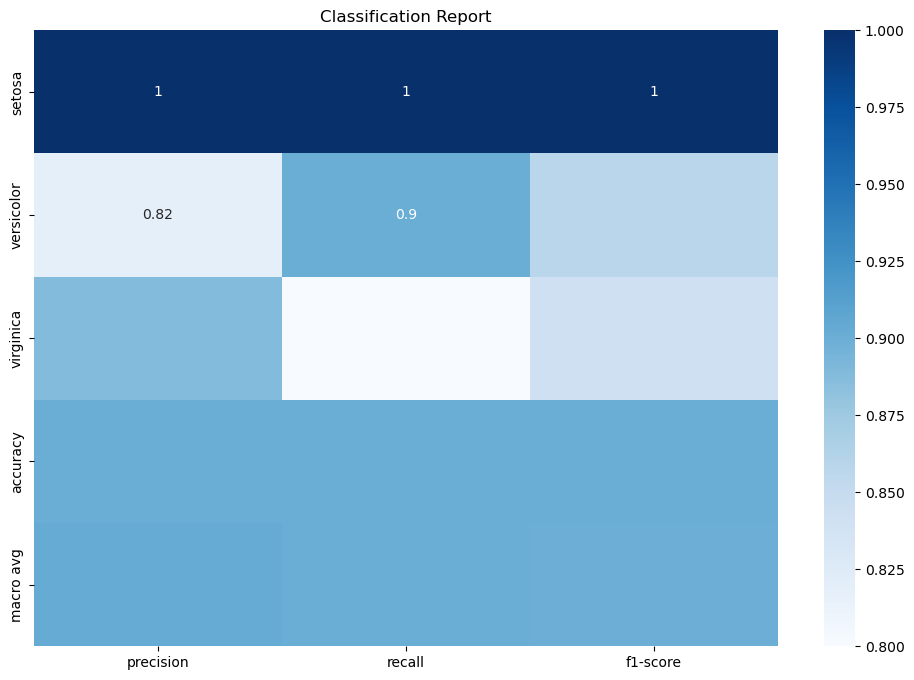

In [20]:
report_df = pd.DataFrame(classification_report(y_test, y_pred, target_names=data.target_names, output_dict=True)).T
plt.figure(figsize=(12, 8))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

This heatmap visualizes the classification report, showing precision, recall, and F1 score for each class. It provides a comprehensive view of the model's performance across different classes.


# 10. Matthews Correlation Coefficient (MCC)
The MCC is a measure of the quality of binary classifications. It considers all four confusion matrix categories (TP, TN, FP, FN) and is useful for imbalanced datasets.<br><br>
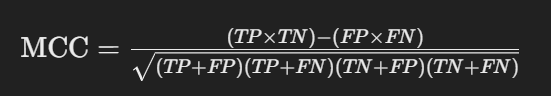

In [21]:
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Matthews Correlation Coefficient (MCC): 0.8514


# 11. Cohen’s Kappa
Cohen’s Kappa measures the agreement between predicted and actual classifications, adjusting for the agreement occurring by chance.<br><br>
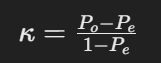
<br><br>
where Po is the observed agreement and Pe is the expected agreement by chance.

In [22]:
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen’s Kappa: {kappa:.4f}")

Cohen’s Kappa: 0.8500


# 12. Balanced Accuracy
Balanced accuracy accounts for imbalanced datasets by averaging the recall obtained on each class.<br><br>
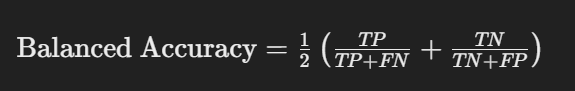
<br><br>

In [23]:
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

Balanced Accuracy: 0.9000


# 13. G-Mean (Geometric Mean)
G-Mean evaluates the balance between the classification performances of the positive and negative classes.
<br><br>
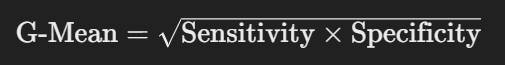
<br><br>
where specificity is the true negative rate.

In [24]:
sensitivity = recall_score(y_test, y_pred, average='macro')
specificity = recall_score(y_test, y_pred, pos_label=0, average='macro')
g_mean = np.sqrt(sensitivity * specificity)
print(f"G-Mean: {g_mean:.4f}")

G-Mean: 0.9000


C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
